## Sentiment analysis for Bank reviews

#### Import packages

In [132]:
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
from nltk.tokenize import sent_tokenize, word_tokenize
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

#### Read data

In [133]:
data_suntrust = pd.read_csv("Suntrust_withjobtitle_Nodup.csv")
data_bbnt = pd.read_csv("BB&T_withjobtitle.csv")
data_chase = pd.read_csv("Chase2_withjobtitle_Nodup.csv")

In [134]:
data_suntrust

,Location,Position,Reviews,Ratings,Date
0,"Smyrna, GA",Universal Banker (Current Employee),The bank is constantly understaffed so the wor...,3,"August 15, 2017"
1,"Atlanta, GA",Treasury (Former Employee),"Whether you are looking to apply at SunTrust, ...",1,"November 5, 2019"
2,"Fort Myers, FL",Teller Coordinator II (Current Employee),I enjoy working for SunTrust. Although a lot o...,5,"November 4, 2019"
3,"Atlanta, GA",Scrum Master (Former Employee),working with one of the must transparent finan...,5,"November 4, 2019"
4,"Walkertown, NC",Licensed Branch Manager (Former Employee),When SunTrust first came to North Carolina the...,1,"November 4, 2019"
5,"Concord, NC",Teller II (Current Employee),My job as a teller keeps me on my toes. I perf...,5,"November 3, 2019"
6,"Wadesboro, NC",Bank Teller (Former Employee),You have to sell sell sell and don't even get ...,3,"November 3, 2019"
7,"Snellville, GA",Financial Services Representative III (Former ...,My experience was mixed. My immediate manager...,3,"November 2, 2019"
8,"Atlanta, GA",Business Information and Reporting Analyst (Cu...,What I love the most about the company is its ...,4,"October 31, 2019"
9,"The Villages, FL",Bank Officer IV (Current Employee),"The atmosphere is very inviting, the people th...",5,"October 31, 2019"


In [135]:
data_bbnt

,Location,Position,Reviews,Ratings,Date
0,"Smyrna, GA",Branch Banker II (Current Employee),Great company to work for. I have been with th...,4,"September 5, 2019"
1,"Charlotte, NC",Treasury Operations Analyst (Current Employee),Great management. Pay could be a whole lot bet...,4,"November 25, 2019"
2,"Camden, NJ",Alcohol Enforcement (Current Employee),Nice place to work. But very unfair when it ca...,1,"November 23, 2019"
3,"Wilson, NC",Senior IT Manager (Current Employee),Have enjoyed the demands in technology rapid c...,4,"November 23, 2019"
4,"Richmond, VA",Senior Securities Analyst - Credit (Former Emp...,This company was great. Management takes inves...,4,"November 23, 2019"
5,"Washington, DC",Team leader (Former Employee),"A bank that maintained its old value, nurtures...",4,"November 22, 2019"
6,"Fayetteville, NC",Branch Banker I (Former Employee),The company as whole was not bad but there was...,3,"November 22, 2019"
7,"Frederick, MD",Investment Associate (Current Employee),Great company to work for with great employees...,5,"November 20, 2019"
8,"Winston-Salem, NC",Various Positions (Former Employee),"As far as working for a commercial bank, BB&T ...",4,"November 19, 2019"
9,"Winston-Salem, NC",Wealth Lending Officer (Former Employee),"Good company, lots of changes in the industry ...",1,"November 18, 2019"


In [136]:
data_chase

,Location,Position,Reviews,Ratings,Date
0,"Marietta, GA",Personal Financial Representative (Former Empl...,Fast paced workplaceManagement stayed engagedE...,4,"March 21, 2016"
1,"New York, NY",Bank Teller/ Head Teller (Former Employee),"The experience was great, will do it again if ...",5,"November 29, 2019"
2,Sg,Acceptable (Former Employee),OkAcceptable Stressful Competitive Move all op...,5,"November 28, 2019"
3,"Chicago, IL",General Clerk for Cook County (Current Employee),I can not give a full review of the company si...,3,"November 27, 2019"
4,"Denver, CO",ADMINISTRATIVE ASSISTANT (Former Employee),No flexibility. Management Sucks. If your a ...,1,"November 27, 2019"
5,"Miami, FL",Customer Sales & Service Representative (Curre...,"Co-workers are nice , I had a great experience...",5,"November 26, 2019"
6,mexico,MANAGER OF FACILITIES & CRITICAL SYSTEMS FOR ...,mi jefe preferia doblar las manos y ser una pe...,1,"November 25, 2019"
7,"Houston, TX",ADMIN-CONTENT SPECIALIST (Former Employee),Very professional and progressive company. I e...,5,"November 25, 2019"
8,Texas,Customer Retention Specialist & Financial Solu...,"A good job, as jobs go. Nothing especially fa...",4,"November 23, 2019"
9,"Portland, OR",Manager (Former Employee),No leadership No support no integrity No sa...,1,"November 22, 2019"


#### Clean the reviews column - Preprocessing

In [137]:
def clean_review(review):
    # Remove unwanted characters
    clean_review = review.replace('â€™',"'")
    # Split the joined words
    for i in range(len(clean_review)-1):
        if clean_review[i].isalpha() and clean_review[i].islower() and clean_review[i+1].isupper():
            clean_review = clean_review[:i+1] + '. ' + clean_review[i+1:]
    # Combine Sun and Trust to avoid misunderstanding
    clean_review = clean_review.replace('Sun. Trust','SunTrust')
#     blob = TextBlob(clean_review)
    # Spellcheck
#     blob = blob.correct()
    return clean_review

In [138]:
reviews = data_suntrust['Reviews'].apply(clean_review)
data_suntrust['Cleaned_reviews']=reviews

In [139]:
reviews = data_bbnt['Reviews'].apply(clean_review)
data_bbnt['Cleaned_reviews']=reviews

In [140]:
reviews = data_chase['Reviews'].apply(clean_review)
data_chase['Cleaned_reviews']=reviews

#### Function for distribution

In [141]:
def distribution(df1,df2,df3):
    positive1=0
    neutral1=0
    negative1=0
    total1 = len(df1)
    for rows in df1['Sentiment']:
        if rows>0.3:
            positive1 = positive1 + 1
        elif rows<=0.3 and rows >-0.3:
            neutral1 = neutral1 + 1
        else:
            negative1= negative1 +1
            
            
    positive2=0    
    neutral2=0
    negative2=0
    total2 = len(df2)
    for rows in df2['Sentiment']:
        if rows>0.3:
            positive2 = positive2 + 1
        elif rows<=0.3 and rows >-0.3:
            neutral2 = neutral2 + 1
        else:
            negative2= negative2 +1
            
    positive3=0
    neutral3=0
    negative3=0
    total3 = len(df3)
    for rows in df3['Sentiment']:
        if rows>0.3:
            positive3 = positive3 + 1
        elif rows<=0.3 and rows >-0.3:
            neutral3 = neutral3 + 1
        else:
            negative3= negative3 +1
    print('Mean for SunTrust: '+str(df1['Sentiment'].mean())+'|| Mean for BB&T: '+str(df2['Sentiment'].mean())+'|| Mean for Chase: '+str(df3['Sentiment'].mean()))
    if total1!=0 and total2!=0 and total3!=0:
        bar_width = 0.3
        x = ['positive','neutral','negative']
        pos = np.arange(len(x))
        plt.bar(pos,[positive1*100/total1,neutral1*100/total1,negative1*100/total1],bar_width)    
        plt.bar(pos+bar_width,[positive2*100/total2,neutral2*100/total2,negative2*100/total2],bar_width)
        plt.bar(pos+2*bar_width,[positive3*100/total3,neutral3*100/total3,negative3*100/total3],bar_width)
        plt.xticks(pos+bar_width, x)
        plt.xlabel('Sentiment')
        plt.ylabel('% of reviews with sentiment')
        plt.legend(['Suntrust','BBNT','Chase'])
        plt.show()
    else:
        print('No related reviews')


### Analysis by reviews

#### Find the sentiment of each review

In [142]:
def find_polarity(review):
    return((sia.polarity_scores(review).get('compound')))

#### Overall sentiment for each company

Mean for SunTrust: 0.4807932533733139|| Mean for BB&T: 0.5505259863945581|| Mean for Chase: 0.5604143374366395


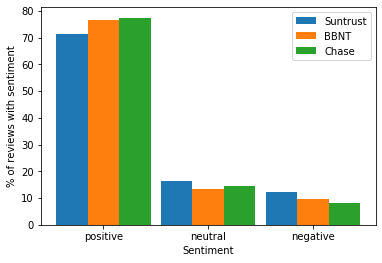

In [143]:
data_suntrust['Sentiment']=data_suntrust['Cleaned_reviews'].apply(find_polarity)
data_bbnt['Sentiment']=data_bbnt['Cleaned_reviews'].apply(find_polarity)
data_chase['Sentiment']=data_chase['Cleaned_reviews'].apply(find_polarity)
distribution(data_suntrust,data_bbnt,data_chase)

### Finding Bag of words

In [213]:
stops=set(stopwords.words('english'))
joined = ' '.join(data_suntrust['Cleaned_reviews'])
dictionary= {}
for word in joined.split():
    if word in dictionary and word not in stops:
        dictionary[word]= dictionary[word]+1
    elif word not in dictionary and word not in stops:
        dictionary[word]=1
        

In [214]:
dictionary

{'The': 601,
 'bank': 136,
 'constantly': 30,
 'understaffed': 5,
 'workload': 10,
 'often': 19,
 'added': 4,
 'current': 28,
 'employees.': 77,
 'Usually': 1,
 'work': 896,
 '40': 8,
 'hours': 86,
 'week': 35,
 'lack': 28,
 'staff.': 25,
 'Whether': 2,
 'looking': 45,
 'apply': 14,
 'SunTrust,': 16,
 'already': 8,
 'gained': 10,
 'employment,': 1,
 'move': 46,
 'on.': 9,
 'Your': 12,
 'talents': 1,
 'appreciated,': 2,
 'individuality': 2,
 'accepted.': 1,
 'culture': 94,
 'promote': 12,
 'manifest': 1,
 'nurture.': 1,
 'Again,': 1,
 'I': 1721,
 'enjoy': 74,
 'working': 360,
 'SunTrust.': 41,
 'Although': 7,
 'lot': 171,
 'teammembers': 1,
 'worried': 5,
 'merging': 2,
 'becoming': 11,
 'Truist': 2,
 'excited': 2,
 'impressed': 3,
 'constant': 10,
 'communication': 22,
 'transparency': 1,
 'SunTrust': 366,
 'throughout': 18,
 'carreer': 1,
 'one': 111,
 'must': 21,
 'transparent': 5,
 'financial': 120,
 'institution': 5,
 'sun': 5,
 'Trust': 24,
 'greatest': 4,
 'achievement': 1,
 '.I'

#### To understand various aspects of work and culture, we pick a few words from bag of words which would describe them

In [145]:
paramters = pd.read_csv('paramters.csv')

In [216]:
paramters.head()

,worklife_balance,pay_benefits,job_security,culture,management,personal_development
0,hectic,bonuses,job_security,abuse,leadership,opportunities
1,stressful,bonus,fire,gossip,manager,advancement
2,family,commission,job_stability,culture,management,career
3,schedule,benefits,layoffs,team,leader,path
4,balance,pay,downsize,environment,politics,promote


#### Find sentences which have information related to each parameter

In [144]:
def find_sentence(review,array):
    temp = []
    for word in array:
        sentences = sent_tokenize(review)
        for sentence in sentences:
            sent2 = sentence.lower().replace('job security','job_security')
            sent2 = sent2.replace('job stability','job_stability')
            if word in sent2.split():
                temp.append(sentence)
    temp1 = ''
    temp = set(temp)
    for i in temp:
        temp1 = temp1+str(i)
    return temp1

#### Find what is affecting the sentiments

In [146]:
def individual_distribution(data1,data2,data3,paramters):
    temp1 = data1.apply(lambda x: find_sentence(x['Cleaned_reviews'],paramters),axis=1)
    temp2 = data2.apply(lambda x: find_sentence(x['Cleaned_reviews'],paramters),axis=1)
    temp3 = data3.apply(lambda x: find_sentence(x['Cleaned_reviews'],paramters),axis=1)
    temp1 = temp1[temp1!='']
    temp2 = temp2[temp2!='']
    temp3 = temp3[temp3!='']
    df1 = pd.DataFrame(data = temp1,columns=['Reviews'])
    df1['Sentiment']=df1['Reviews'].apply(lambda x :sia.polarity_scores(x).get('compound'))
    df2 = pd.DataFrame(data = temp2,columns=['Reviews'])
    df2['Sentiment']=df2['Reviews'].apply(lambda x :sia.polarity_scores(x).get('compound'))
    df3 = pd.DataFrame(data = temp3,columns=['Reviews'])
    df3['Sentiment']=df3['Reviews'].apply(lambda x :sia.polarity_scores(x).get('compound'))
    distribution(df1,df2,df3)

#### Overall Work-life balance

Mean for SunTrust: 0.2151853174603174|| Mean for BB&T: 0.23440427807486633|| Mean for Chase: 0.2524758823529412


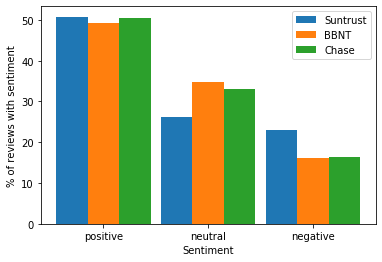

In [147]:
individual_distribution(data_suntrust,data_bbnt,data_chase,paramters['worklife_balance'])

#### Pay benefits

Mean for SunTrust: 0.3288715328467151|| Mean for BB&T: 0.5063889534883725|| Mean for Chase: 0.43270276679841907


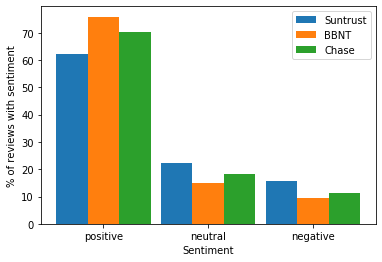

In [148]:
individual_distribution(data_suntrust,data_bbnt,data_chase,paramters['pay_benefits'])

#### Job Security

Mean for SunTrust: 0.05907391304347826|| Mean for BB&T: 0.2270181818181818|| Mean for Chase: 0.15092000000000003


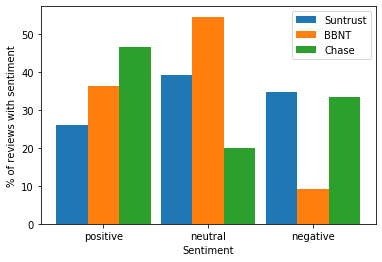

In [149]:
individual_distribution(data_suntrust,data_bbnt,data_chase,paramters['job_security'])

#### Culture

Mean for SunTrust: 0.41321531365313674|| Mean for BB&T: 0.5129118110236224|| Mean for Chase: 0.4959274390243899


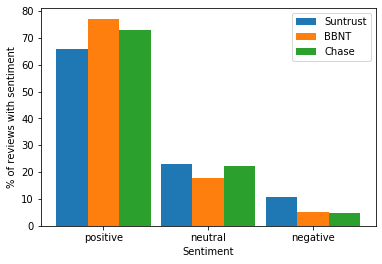

In [150]:
individual_distribution(data_suntrust,data_bbnt,data_chase,paramters['culture'])

#### Management

Mean for SunTrust: 0.2522459501557631|| Mean for BB&T: 0.29680751072961337|| Mean for Chase: 0.37001712846347595


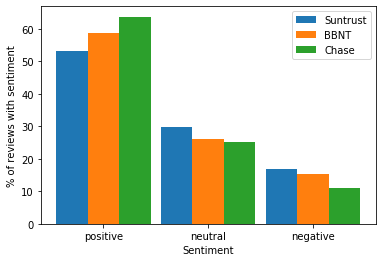

In [151]:
individual_distribution(data_suntrust,data_bbnt,data_chase,paramters['management'])

#### Personal Development

Mean for SunTrust: 0.4590936329588009|| Mean for BB&T: 0.37743371428571404|| Mean for Chase: 0.46618373493975895


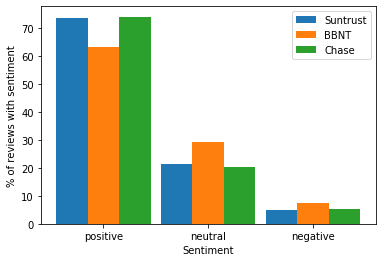

In [152]:
individual_distribution(data_suntrust,data_bbnt,data_chase,paramters['personal_development'])

### Analysis by place

In [153]:
def split_location(loc):
    count = str(loc).count(', ')
    if count > 0:
        comb = loc.split(', ')
        state = comb[-1]
    else: 
        count = str(loc).count(',')
        if count > 0:
            comb = loc.split(',')
            state = comb[-1]
        else:
            state = loc
    return str(state).upper()

In [154]:
# Get state from Location, if not then just get the lcoation
data_bbnt['State'] =data_bbnt['Location'].apply(lambda x: split_location(x))
data_chase['State'] =data_chase['Location'].apply(lambda x: split_location(x))
data_suntrust['State'] =data_suntrust['Location'].apply(lambda x: split_location(x))

In [155]:
def state(loc):
    mp = {'FLORIDA': 'FL', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 'ATLANTA': 'GA', 'GEORGIA':'GA',
         'FL':'FL', 'VIRIGINIA':'VA', 'VA':'VA', 'GA':'GA', 'SC':'SC','NC':'NC', 'CA':'CA',
          'MEMPHIS':'TN', 'TN':'TN', 'TX':'TX', 'NY': 'NY', 'IL':'IL', 'LA':'CA', 'OH':'OH' , 'BRONX':'NY',
          'MARYLAND':'MD','MD':'MD', 'TENNESSEE':'TN', 'SANDY' : 'GA', 'CHARLOTTE':'NC','NASHVILLE':'TN',
         'WASHINTON':'WA', 'KISSIMEE':'FL','TAMPA':'FL','ORLANDO':'FL','RICHMOND':'VA',
         'CHATTANOOGA':'TN', 'BRANDON':'GA', 'DAYTONA':'FL','LAUDERDALE':'FL','NORTH':'NC','SOUTH':'SC',
         "MID-ATL": 'GA', 'GA.':'GA', 'VIRGNINA':'VA', 'CALIFORNIA':'CA', 'LOS':'CA', 'TEXAS':'TX', 
         'ILLINOIS': 'IL' , 'YORK':'NY','JERSEY': 'NY', 'DALLAS':'TX', 'PORTLAND':'OR','MANHATTAN':'NY',
         'CHICAGO':'IL', 'NYC':'NY','NEWYORK':'NY', 'WISCONSIN':'WI', 'OHIO':'OH', 'OREGON':'OG',
         'TX.':'TX', 'N.Y':'NY', 'AZ.':'AZ','MICH':'MI','CA.':'CA', 'INDIANAPOLIS':'IN', 'MISSOURI':'MI',
         'WILMINGTON':'NC','LOUISIANA':'LA','YROK':'NY','ANTONIO':'TX','TORRANCE':'CA','GLENDORA':'CA',
         'TAGUIG':'NAN','BUENOS':'NAN'}
    comb = str(loc).split(' ')
    for word in comb:
        if word in mp:
            state = mp[word]
            break
        else:
            state = loc
    return state

In [156]:
# get states from the raw locations available

data_bbnt['State'] = data_bbnt['State'].apply(lambda x: state(x))
data_chase['State'] = data_chase['State'].apply(lambda x: state(x))
data_suntrust['State'] = data_suntrust['State'].apply(lambda x: state(x))

#### Let us perform our analysis on only GA, CA, NY 

In [157]:
GA_bbnt = data_bbnt[data_bbnt['State']=='GA']
CA_bbnt = data_bbnt[data_bbnt['State']=='CA']
NY_bbnt = data_bbnt[data_bbnt['State']=='NY']

GA_chase = data_chase[data_chase['State']=='GA']
CA_chase = data_chase[data_chase['State']=='CA']
NY_chase = data_chase[data_chase['State']=='NY']

GA_suntrust = data_suntrust[data_suntrust['State']=='GA']
CA_suntrust = data_suntrust[data_suntrust['State']=='CA']
NY_suntrust = data_suntrust[data_suntrust['State']=='NY']

#### Worklife Balance in each state

#### work life balance in GA

Mean for SunTrust: 0.29840987654320994|| Mean for BB&T: 0.5735374999999999|| Mean for Chase: 0.30615000000000003


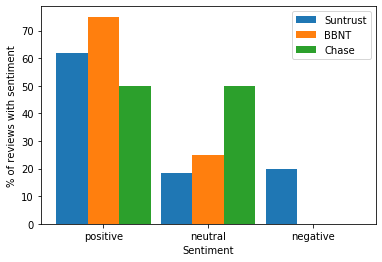

In [158]:
individual_distribution(GA_suntrust,GA_bbnt,GA_chase,paramters['worklife_balance'])

#### Work life balance in CA

Mean for SunTrust: -0.3818|| Mean for BB&T: 0.3143|| Mean for Chase: 0.24235714285714285


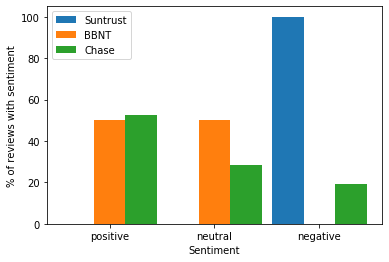

In [159]:
individual_distribution(CA_suntrust,CA_bbnt,CA_chase,paramters['worklife_balance'])

#### Pay Benefits in each state

#### Pay benefits in GA

Mean for SunTrust: 0.41251875000000016|| Mean for BB&T: 0.7349679012345688|| Mean for Chase: 0.33203333333333335


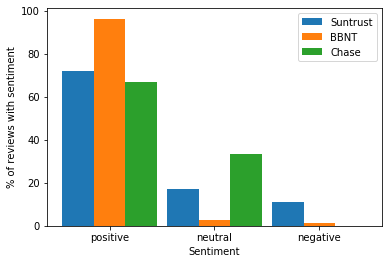

In [160]:
individual_distribution(GA_suntrust,GA_bbnt,GA_chase,paramters['pay_benefits'])

#### Pay benefits in CA

In [161]:
individual_distribution(CA_suntrust,CA_bbnt,CA_chase,paramters['pay_benefits'])

Mean for SunTrust: 0.1779|| Mean for BB&T: nan|| Mean for Chase: 0.2929666666666667
No related reviews


#### Job Security in each state

#### Job security in GA

In [162]:
individual_distribution(GA_suntrust,GA_bbnt,GA_chase,paramters['job_security'])

Mean for SunTrust: -0.09396666666666668|| Mean for BB&T: nan|| Mean for Chase: nan
No related reviews


#### Job security in CA

In [163]:
individual_distribution(CA_suntrust,CA_bbnt,CA_chase,paramters['job_security'])

Mean for SunTrust: nan|| Mean for BB&T: nan|| Mean for Chase: -0.4588
No related reviews


#### Management in each state

#### Management in GA

Mean for SunTrust: 0.19897514124293786|| Mean for BB&T: 0.3537281250000001|| Mean for Chase: 0.1367


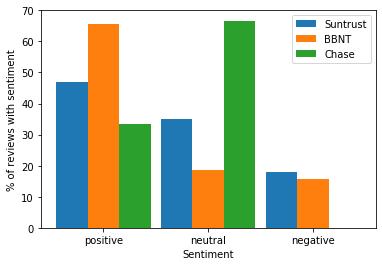

In [164]:
individual_distribution(GA_suntrust,GA_bbnt,GA_chase,paramters['management'])

#### Management in CA

Mean for SunTrust: 0.0|| Mean for BB&T: 0.62355|| Mean for Chase: 0.3530840579710144


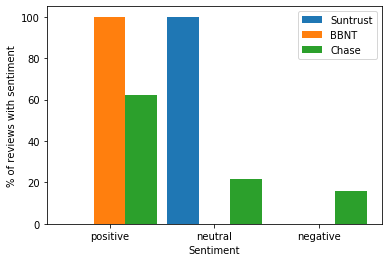

In [165]:
individual_distribution(CA_suntrust,CA_bbnt,CA_chase,paramters['management'])

#### Personal Development in each state

#### Personal development in GA

Mean for SunTrust: 0.5120773333333334|| Mean for BB&T: 0.345775|| Mean for Chase: 0.6282


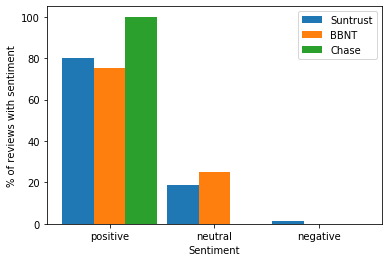

In [166]:
individual_distribution(GA_suntrust,GA_bbnt,GA_chase,paramters['personal_development'])

#### Personal development in CA

In [167]:
individual_distribution(CA_suntrust,CA_bbnt,CA_chase,paramters['personal_development'])

Mean for SunTrust: nan|| Mean for BB&T: nan|| Mean for Chase: 0.432725
No related reviews


### Analysis by time

##### Yearly Sentiment Trend

In [168]:
data_suntrust['date2']=data_suntrust.Date.apply(lambda x:x.split(','))
data_suntrust['Year']=data_suntrust['date2'].apply(lambda x: x[1])
sentiment_by_Year=data_suntrust.groupby('Year').mean().Sentiment
x1=sentiment_by_Year.index
y1=sentiment_by_Year.values

data_bbnt['date2']=data_bbnt.Date.apply(lambda x:x.split(','))
data_bbnt['Year']=data_bbnt['date2'].apply(lambda x: x[1])
sentiment_by_Year=data_bbnt.groupby('Year').mean().Sentiment
x2=sentiment_by_Year.index
y2=sentiment_by_Year.values

data_chase['date2']=data_chase.Date.apply(lambda x:x.split(','))
data_chase['Year']=data_chase['date2'].apply(lambda x: x[1])
sentiment_by_Year=data_chase.groupby('Year').mean().Sentiment
x3=sentiment_by_Year.index
y3=sentiment_by_Year.values

In [169]:
sentiment_by_Year

Year
 2012    0.586231
 2013    0.547189
 2014    0.499604
 2015    0.614726
 2016    0.607901
 2017    0.543643
 2018    0.550706
 2019    0.567996
Name: Sentiment, dtype: float64

#### Time series analysis for SunTrust

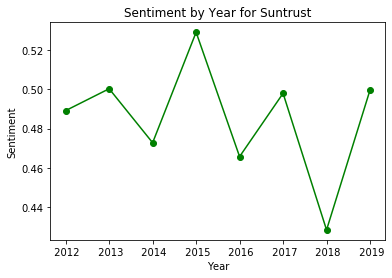

In [190]:
plt.plot(x1, y1, '-o',color='green')

plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title('Sentiment by Year for Suntrust')
plt.show()


#### Time series analysis for BB&T

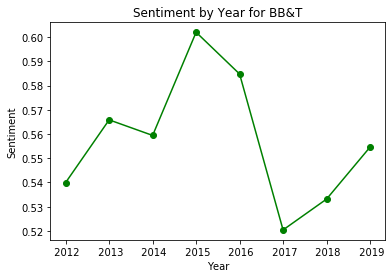

In [189]:
plt.plot(x2, y2, '-o',color='green')

plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title('Sentiment by Year for BB&T')
plt.show()


#### Time series analysis for Chase

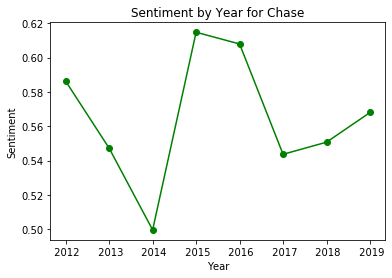

In [191]:
plt.plot(x3, y3, '-o',color='green')


plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title('Sentiment by Year for Chase')
plt.show()


### Analysis by designation

#### Overall sentiment from Analysts and Tellers

In [173]:
# Find the reviews containing a string like "Analyst"
def select(df, designation_str):
    data_selected=df[df['Position'].str.contains(designation_str)]
    data_selected['Sentiment']=data_selected['Reviews'].apply(lambda x :sia.polarity_scores(x).get('compound'))
    return data_selected

C:\Users\Satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Mean for SunTrust: 0.5595883211678832|| Mean for BB&T: 0.6497582278481012|| Mean for Chase: 0.4899049180327869


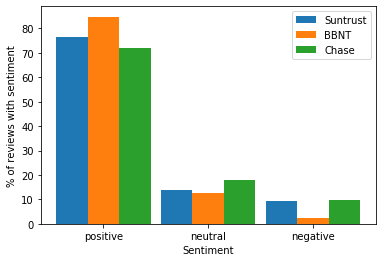

In [174]:
data_selected_suntrust_analyst = select(data_suntrust, 'Analyst')
data_selected_bbnt_analyst = select(data_bbnt, 'Analyst')
data_selected_chase_analyst = select(data_chase, 'Analyst')

distribution(data_selected_suntrust_analyst,data_selected_bbnt_analyst,data_selected_chase_analyst)

C:\Users\Satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Mean for SunTrust: 0.47429345238095244|| Mean for BB&T: 0.5228701067615658|| Mean for Chase: 0.6424097633136092


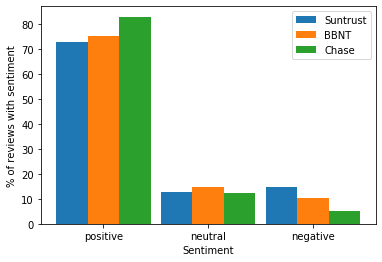

In [175]:
data_selected_suntrust_teller = select(data_suntrust, 'Teller')
data_selected_bbnt_teller = select(data_bbnt, 'Teller')
data_selected_chase_teller = select(data_chase, 'Teller')

distribution(data_selected_suntrust_teller,data_selected_bbnt_teller,data_selected_chase_teller)

#### Work-life balance for analysts

Mean for SunTrust: 0.5306846153846154|| Mean for BB&T: 0.30595714285714287|| Mean for Chase: 0.3591166666666667


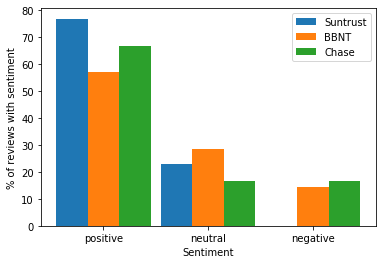

In [176]:
individual_distribution(data_selected_suntrust_analyst,data_selected_bbnt_analyst,data_selected_chase_analyst,paramters['worklife_balance'])

#### Work-life balance for tellers

Mean for SunTrust: 0.09219791666666667|| Mean for BB&T: 0.19981666666666667|| Mean for Chase: 0.1995456521739131


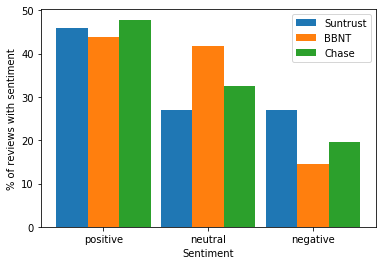

In [177]:
individual_distribution(data_selected_suntrust_teller,data_selected_bbnt_teller,data_selected_chase_teller,paramters['worklife_balance'])

#### Pay benefits for analysts

Mean for SunTrust: 0.2825333333333333|| Mean for BB&T: 0.6357999999999999|| Mean for Chase: 0.6492444444444444


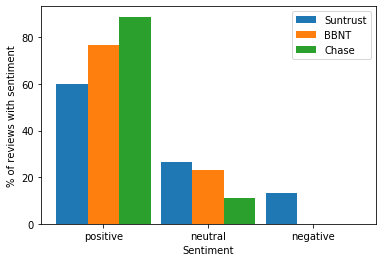

In [178]:
individual_distribution(data_selected_suntrust_analyst,data_selected_bbnt_analyst,data_selected_chase_analyst,paramters['pay_benefits'])

#### Pay benefits for tellers

Mean for SunTrust: 0.27929000000000004|| Mean for BB&T: 0.35553538461538464|| Mean for Chase: 0.45351016949152545


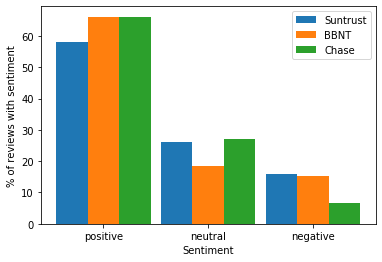

In [179]:
individual_distribution(data_selected_suntrust_teller,data_selected_bbnt_teller,data_selected_chase_teller,paramters['pay_benefits'])

#### Job security for analysts

In [180]:
individual_distribution(data_selected_suntrust_analyst,data_selected_bbnt_analyst,data_selected_chase_analyst,paramters['job_security'])

Mean for SunTrust: -0.2446|| Mean for BB&T: 0.2552|| Mean for Chase: nan
No related reviews


#### Job security for tellers

Mean for SunTrust: 0.32995|| Mean for BB&T: 0.5719|| Mean for Chase: 0.2521


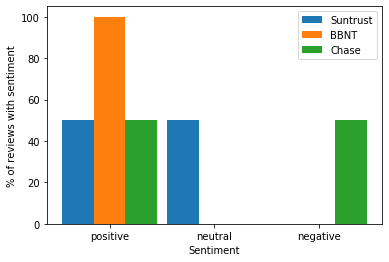

In [181]:
individual_distribution(data_selected_suntrust_teller,data_selected_bbnt_teller,data_selected_chase_teller,paramters['job_security'])

#### Culture for analysts

Mean for SunTrust: 0.41400000000000003|| Mean for BB&T: 0.5015206896551725|| Mean for Chase: 0.42778181818181815


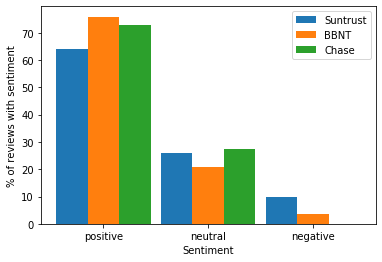

In [182]:
individual_distribution(data_selected_suntrust_analyst,data_selected_bbnt_analyst,data_selected_chase_analyst,paramters['culture'])

#### Culture for tellers

Mean for SunTrust: 0.42454931506849314|| Mean for BB&T: 0.49998253968253964|| Mean for Chase: 0.5642855555555555


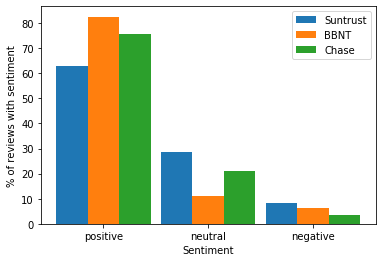

In [183]:
individual_distribution(data_selected_suntrust_teller,data_selected_bbnt_teller,data_selected_chase_teller,paramters['culture'])

#### Management for analysts

Mean for SunTrust: 0.28011351351351355|| Mean for BB&T: 0.40777500000000005|| Mean for Chase: 0.44157368421052634


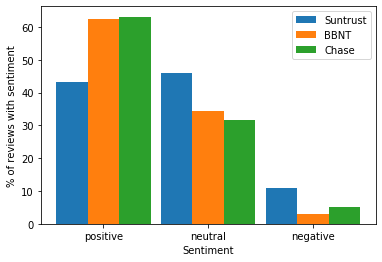

In [184]:
individual_distribution(data_selected_suntrust_analyst,data_selected_bbnt_analyst,data_selected_chase_analyst,paramters['management'])

#### Management for tellers

Mean for SunTrust: 0.25180967741935484|| Mean for BB&T: 0.3178835164835164|| Mean for Chase: 0.444372727272727


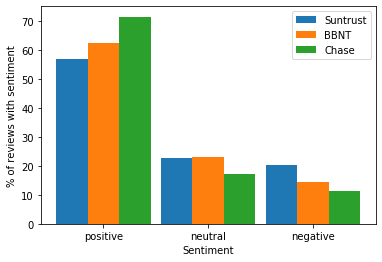

In [185]:
individual_distribution(data_selected_suntrust_teller,data_selected_bbnt_teller,data_selected_chase_teller,paramters['management'])

#### Personal development for analysts

Mean for SunTrust: 0.4662217391304348|| Mean for BB&T: 0.22590000000000002|| Mean for Chase: 0.45760000000000006


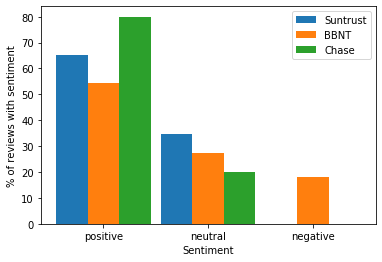

In [186]:
individual_distribution(data_selected_suntrust_analyst,data_selected_bbnt_analyst,data_selected_chase_analyst,paramters['personal_development'])

#### Personal development for tellers

Mean for SunTrust: 0.3542657142857143|| Mean for BB&T: 0.23947037037037036|| Mean for Chase: 0.4930384615384615


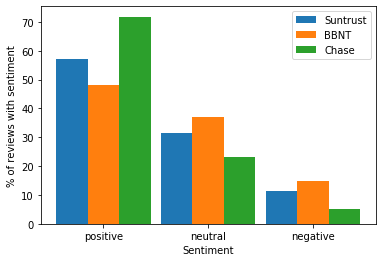

In [187]:
individual_distribution(data_selected_suntrust_teller,data_selected_bbnt_teller,data_selected_chase_teller,paramters['personal_development'])